In [1]:
# ----Import libraries
 
import numpy as np
import pandas as pd
import mygene
import seaborn as sns
import matplotlib.pyplot as plt
import tspex


exp = pd.read_csv('https://storage.googleapis.com/gtex_analysis_v8/rna_seq_data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz', sep='\t', skiprows=2, index_col='Description')
exp.drop(columns = 'Name', inplace = True)

In [2]:
exp = exp[['Brain - Amygdala',
       'Brain - Anterior cingulate cortex (BA24)',
       'Brain - Caudate (basal ganglia)', 'Brain - Cerebellar Hemisphere',
       'Brain - Cerebellum', 'Brain - Cortex', 'Brain - Frontal Cortex (BA9)',
       'Brain - Hippocampus', 'Brain - Hypothalamus',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Brain - Spinal cord (cervical c-1)',
       'Brain - Substantia nigra']]

In [8]:
genes['0']

0         YES1
1        CHRM2
2      IL22RA2
3         TYK2
4      SIGLEC9
        ...   
621     LILRA1
622      GALR2
623      WNT3A
624      KITLG
625       CCN1
Name: 0, Length: 626, dtype: object

ValueError: The condensed distance matrix must contain only finite values.

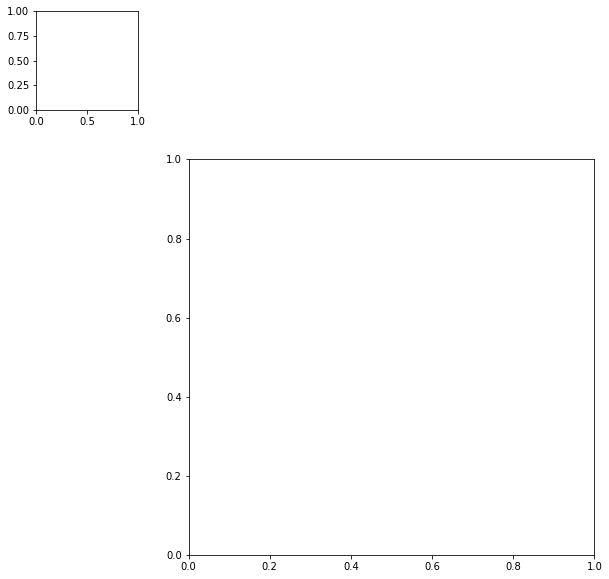

In [42]:
res = 0.5
genes = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % res, index_col = 1)

df = exp.loc[list(genes.drop(['C4B_2', 'CILK1', 'CCN2', 'SLURP2', 'KIR2DL5A', 'CCN1'], axis = 0).index.unique())]
sns.clustermap(df, cmap='viridis', standard_scale=0)
plt.savefig('plots/03-LR_network_visualisation/03b-genetic_association_threshold_GTEx/major_network_%s_GTEx.png' % res, dpi=300)
plt.show()

Brain - Amygdala                             1154.310
Brain - Anterior cingulate cortex (BA24)      757.225
Brain - Caudate (basal ganglia)              1593.450
Brain - Cerebellar Hemisphere                 629.459
Brain - Cerebellum                            748.885
Brain - Cortex                                604.172
Brain - Frontal Cortex (BA9)                  624.094
Brain - Hippocampus                           611.904
Brain - Hypothalamus                          954.067
Brain - Nucleus accumbens (basal ganglia)    1659.280
Brain - Putamen (basal ganglia)              1510.330
Brain - Spinal cord (cervical c-1)           3673.920
Brain - Substantia nigra                     1673.380
dtype: float64